This notebook will take two genes and plot their RNA/protein correlations from each other.


In [1]:
import pandas as pd
import seaborn as sns
from predict_protein import download_cptac, select_features, train_model, utils

get_dataframe = utils.get_dataframe

In [2]:
single = get_dataframe('/Volumes/Ginkgo_Data/Data/2021-11_CPTACTrainedModels/out2/tumor8_elastic_single.p')
corum = get_dataframe('/Volumes/Ginkgo_Data/Data/2021-11_CPTACTrainedModels/out2/tumor8_elastic_corum.p')

print(single)
print(corum)

single = single.rename(columns={'corr_test': 'single_corr'})
corum = corum.rename(columns={'corr_test': 'corum_corr'})

         corr_train  corr_test  r2_train   r2_test  num_obs  num_features  \
A1BG       0.111214   0.121496 -0.016960 -0.021665      958             1   
A2M        0.393408   0.435899  0.152419  0.180126      958             1   
A2ML1      0.592190   0.648218  0.000760  0.154605      523             1   
AAAS       0.254348   0.143902  0.045410  0.010045      958             1   
AACS       0.589816   0.560159  0.318110  0.281553      958             1   
...             ...        ...       ...       ...      ...           ...   
ZNF85      0.031400  -0.016133 -0.124018 -0.099983      120             1   
ZNF880     0.141143   0.131113 -0.013896 -0.062180      141             1   
ZNF91      0.279386   0.407863 -0.070468 -0.192429      136             1   
ZNF92      0.206559   0.223711 -0.007457 -0.052657      159             1   
ZSCAN5A    0.225786   0.185659 -0.113084 -0.220794       76             1   

            nrmse  baseline_nrmse  
A1BG     0.408447        0.408660  
A2M

In [3]:
combined = single[['single_corr', 'num_obs', 'num_features']].merge(corum[['corum_corr']], left_index=True, right_index=True)
combined['diff'] = combined.corum_corr - combined.single_corr

In [4]:
proteins_of_interest = list(combined[(combined['diff'] > 0.2) & (combined['num_obs'] >= 1)].index)
len(proteins_of_interest)
print(proteins_of_interest)

['ACTB', 'ACTN4', 'ACTR2', 'ACTR3', 'AFF4', 'AIMP1', 'ANAPC10', 'AP1M2', 'AP3M1', 'AP5M1', 'AP5S1', 'AP5Z1', 'API5', 'APOL1', 'AQR', 'ARID4B', 'ARPC3', 'ASCC1', 'ASCC2', 'ATP6V1A', 'AXIN1', 'BANF1', 'BAZ2A', 'BBS1', 'BBS2', 'BBS7', 'BCAS2', 'BCL10', 'BECN1', 'BLOC1S6', 'BORCS6', 'BRD4', 'BRD7', 'BRIX1', 'BRMS1', 'BUB3', 'BUD31', 'CAPN1', 'CAPZB', 'CBX3', 'CCDC22', 'CCDC93', 'CCNH', 'CCNT1', 'CD2BP2', 'CDC5L', 'CDK11B', 'CDK7', 'CDK9', 'CENPC', 'CHD4', 'CHERP', 'CHTF18', 'CLP1', 'CLTC', 'CMC1', 'CNOT10', 'CNOT3', 'CNOT9', 'COG2', 'COG4', 'COG8', 'COMMD1', 'COMMD4', 'COMMD5', 'COMMD7', 'COMMD8', 'COPS2', 'COX16', 'CP', 'CPSF1', 'CPSF2', 'CPSF6', 'CREBBP', 'CRNKL1', 'CTBP1', 'CTNNB1', 'CTNNBL1', 'CTR9', 'CUL4B', 'CWC15', 'CWC22', 'CXXC1', 'DAG1', 'DAP3', 'DDX17', 'DDX21', 'DDX23', 'DDX39B', 'DDX3X', 'DDX41', 'DDX46', 'DDX5', 'DDX6', 'DGCR8', 'DHX15', 'DHX16', 'DHX35', 'DHX8', 'DHX9', 'DLG4', 'DMAP1', 'DNAJC8', 'DNTTIP1', 'DNTTIP2', 'DPF2', 'DRAP1', 'DYNC1H1', 'DYNLT1', 'E2F6', 'EBNA1BP2',

In [5]:
cptac_list = download_cptac.download_cptac(n_tumors=8)
tumor_df = pd.concat(cptac_list)
tm = train_model.LearnCPTAC(tumor_df)


cptac warning: transcriptomics data was not found for the following samples, so transcriptomics data columns were filled with NaN for these samples: C3L-00563.N, C3L-00605.N, C3L-00769.N, C3L-00770.N, C3L-00771.N, C3L-00930.N, C3L-00947.N, C3L-00963.N, C3L-01246.N, C3L-01249.N, C3L-01252.N, C3L-01256.N, C3L-01257.N, C3L-01744.N, C3N-00200.N, C3N-00729.N, C3N-01211.N, NX1.N, NX10.N, NX11.N, NX12.N, NX13.N, NX14.N, NX15.N, NX16.N, NX17.N, NX18.N, NX2.N, NX3.N, NX4.N, NX5.N, NX6.N, NX7.N, NX8.N, NX9.N (/Users/edwardlau/PythonProjects/CPTAC_Protein/predict_protein/download_cptac.py, line 37)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01OV002, 01OV008, 01OV010, 01OV013, 01OV019, 01OV045, 01OV046, 01OV049, 02OV035, 02OV040, 02OV042, 02OV045, 04OV041, 11OV009, 13OV004, 17OV019, 17OV034, 22OV001, 26OV010 (/Users/edwardlau/PythonProjects/CPTAC_Protein/predict_protein/download_cptac.py, line 41)
cptac

In [29]:
# Good combinations
# g1 = 'CMC1'
# g2 = 'MT-CO1'
# g1 = 'PCCB'
# g2 = 'PCCA'

g1 = 'SNF8'
g2 = 'VPS36'

plot_df = tm.df[[ g1 + '_proteomics', g1 + '_transcriptomics', g2+ '_proteomics', g2 + '_transcriptomics']]

plot_df

Name,SNF8_proteomics,SNF8_transcriptomics,VPS36_proteomics,VPS36_transcriptomics
Patient_ID,,,,
OV01OV002,NaN,-0.660270,NaN,-0.072913
OV01OV007,-0.200011,-0.202220,-0.11558,0.162790
OV01OV008,NaN,-0.665517,NaN,-0.494758
OV01OV010,NaN,-1.315740,NaN,-1.475329
OV01OV013,NaN,-0.562752,NaN,0.840242
...,...,...,...,...
LSC3N-03886.N,0.291000,NaN,0.56920,NaN
LSC3N-04124.N,0.686300,-0.755844,0.61800,0.937319
LSC3N-04127.N,1.105000,-0.883203,0.75900,1.048613


In [30]:
g1_p = plot_df[g1 + '_proteomics']
g1_t = plot_df[g1 + '_transcriptomics']
g2_p = plot_df[g2 + '_proteomics']
g2_t = plot_df[g2 + '_transcriptomics']

print('P1 to T1', g1_p.corr(g1_t))
print('P2 to T2', g2_p.corr(g2_t))

print('P1 to P2', g1_p.corr(g2_p))
print('T1 to T2', g1_t.corr(g2_t))

print('P1 to T2', g1_p.corr(g2_t))
print('P2 to T1', g2_p.corr(g1_t))

P1 to T1 -0.023049404859382235
P2 to T2 0.4748148581295566
P1 to P2 0.7610841054362767
T1 to T2 -0.22829470795696324
P1 to T2 0.44427716727088423
P2 to T1 -0.08827073721629333


In [31]:
plot_df.corr()

Name,SNF8_proteomics,SNF8_transcriptomics,VPS36_proteomics,VPS36_transcriptomics
Name,,,,
SNF8_proteomics,1.000000,-0.023049,0.761084,0.444277
SNF8_transcriptomics,-0.023049,1.000000,-0.088271,-0.228295
VPS36_proteomics,0.761084,-0.088271,1.000000,0.474815
VPS36_transcriptomics,0.444277,-0.228295,0.474815,1.000000


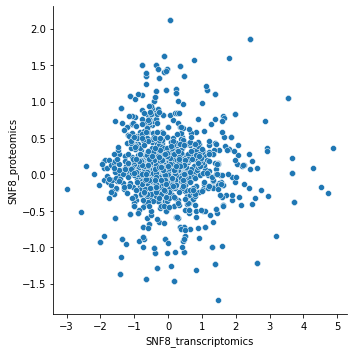

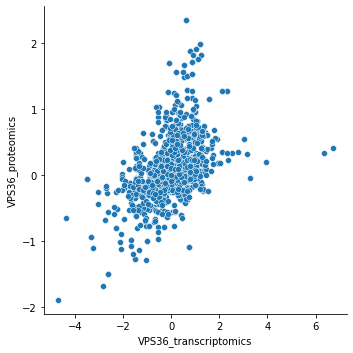

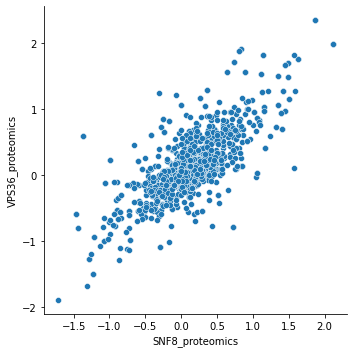

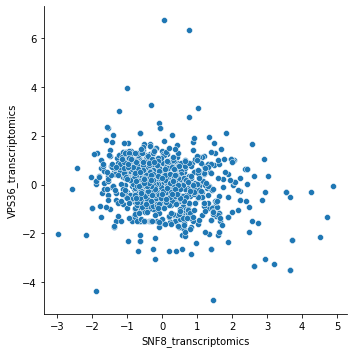

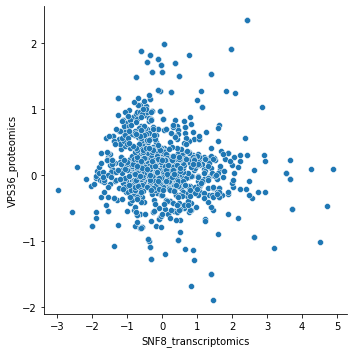

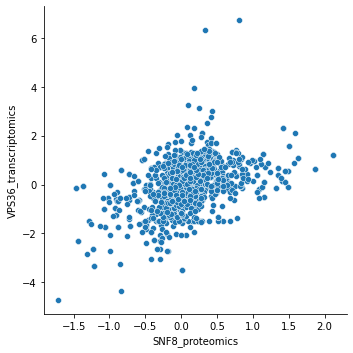

In [32]:
sns.relplot(data = plot_df,
            x= g1 + '_transcriptomics',
            y = g1 + '_proteomics')

sns.relplot(data = plot_df,
            x= g2 + '_transcriptomics',
            y = g2 + '_proteomics')

sns.relplot(data = plot_df,
            x= g1 + '_proteomics',
            y = g2 + '_proteomics')

sns.relplot(data = plot_df,
            x= g1 + '_transcriptomics',
            y = g2 + '_transcriptomics')

sns.relplot(data = plot_df,
            x= g1 + '_transcriptomics',
            y = g2 + '_proteomics')

sns.relplot(data = plot_df,
            x= g1 + '_proteomics',
            y = g2 + '_transcriptomics')

In [28]:
plot_df.to_csv(f'06_PlotRNAProteinCorrelations_Output/{g1}_{g2}.csv', index=False)